# Look at the data 

In [6]:
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

filename = 'train.csv' 
df = pd.read_csv(filename)
df.head()

,GameId,PlayId,Team,X,Y,S,A,Dis,Orientation,Dir,...,Week,Stadium,Location,StadiumType,Turf,GameWeather,Temperature,Humidity,WindSpeed,WindDirection
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,81.99,177.18,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,27.61,198.70,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,3.01,202.73,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,359.77,105.64,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW
4,2017090700,20170907000118,away,69.32,35.42,1.82,2.43,0.16,12.63,164.31,...,1,Gillette Stadium,"Foxborough, MA",Outdoor,Field Turf,Clear and warm,63.0,77.0,8,SW


# Look at some Null Values 

In [7]:
field_positions = df['FieldPosition']
print(sum(field_positions.isnull()==True))

6424


# PreProcess the Data

## Calculate number of yards remaining 

In [8]:
yard_lines = df['YardLine']
field_positions = df['FieldPosition']
possession_teams = df['PossessionTeam'] 

yard_lines_adjusted = 100 - yard_lines[field_positions!=possession_teams]
yards_remaining = yard_lines[field_positions==possession_teams].append(yard_lines_adjusted)

# Perform Naive Bayes 

## Calculate probability of x yards gained given y yards remaining

In [9]:
yards = df['Yards']

yard_counts = np.zeros((99,199), dtype = 'uint32')
yard_probabilities = np.zeros((99,199), dtype = 'float')

for yard_remaining in range(1,100):
    yards_current = yards[yards_remaining==yard_remaining]
    
    for yard in range(-99, 100):
        yard_counts[yard_remaining-1,yard+99] = sum(yards_current==yard)
        
    yard_probabilities[yard_remaining-1,:] = yard_counts[yard_remaining-1,:] / np.sum(yard_counts[yard_remaining-1,:])

## Plot Probabilities 

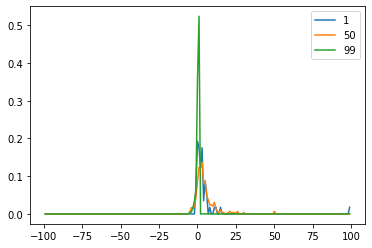

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00803213
 0.00401606 0.01204819 0.02409639 0.04417671 0.04819277 0.09638554
 0.11646586 0.08032129 0.13253012 0.08835341 0.06425703 0.06827309
 0.0562249  0.04016064 0.02811245 0.00803213 0.01204819 0.01204819
 0.01204819 0.00803213 0.00803213 0.         0.         0.
 0.         0.00401606 0.00401606 0.         0.00401606 0.00401606
 0.         0.00401606 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00401606 0.         0.
 0.         0.         0.         0.         0.         0.
 0.00401606]


In [46]:
for yard_line in [1,50,99]:
    yard_line_index = yard_line -1
    plt.plot(np.arange(-99,100),yard_probabilities[yard_line_index,:], label = str(yard_line))
    
plt.legend()    
plt.show() 

# Observations: seems like there is some data missing...
# at the 50 yard line, many yards gained in the 0-50 window have 0 probability, 
# even those should have almost certainly happened some! 
# uncomment the line below for an example 
# Is Laplace smoothing the solution? Or something more significant? 
print(yard_probabilities[50, 52:149]) # look at all possible yards gained at the 50 yard line 